# Lecture 9 Report
Nonlinear Time Series Analysis - Computer Science Master's Degree Course - Federal University of São Paulo (UNIFESP) - Prof. Elbert E. N. Macau

Author: Rafael Leiniö


## Algorithm Implementations

- [Heun](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/heun.py)
- [Runge Kutta 2nd Order](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/runge_kutta_second_order.py)
- [Runge Kutta 3rd Order](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/runge_kutta_third_order.py)
- [Runge Kutta 4th Order](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/runge_kutta_fourth_order.py)
- [Runge Kutta 5th Order](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/runge_kutta_fifth_order.py)
- [Runge Kutta Fehlberd (RKF45)](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/runge_kutta_fehlberg.py)


# Experiments:


In [1]:
# fix working dir
import pathlib
import os
path = os.path.join(pathlib.Path().absolute(), '../..')
os.chdir(path)

# imports
from math import exp
from ntsa.algorithms import (
    Euler,
    Heun,
    RungeKuttaSecondOrder,
    RungeKuttaThirdOrder,
    RungeKuttaFourthOrder,
    RungeKuttaFifthOrder,
    RungeKuttaFehlberg
)
from ntsa.tools import DataViz
data_viz = DataViz()

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

## 9.1 Example

Given an EDO in the form of

#### `dy/dt = (t - y) / 2`

#### On [0, 3] with `t0 = 0`, `y0 = 1`, test `h = 1/2, 1/4, 1/8` comparing Heun method with Euler Method

In [2]:
t0 = 0
y0 = 1
dydt = lambda t, y: (t - y) / 2
exact_solution = [{"t": 0, "y": 1.0}, {"t": 0.125, "y": 0.943239}, {"t": 0.25, "y": 0.897491}, {"t": 0.375, "y": 0.862087}, {"t": 0.5, "y": 0.836402}, {"t": 0.75, "y": 0.811868}, {"t": 1, "y": 0.819592}, {"t": 1.5, "y": 0.917100}, {"t": 2, "y": 1.103638}, {"t": 2.5, "y": 1.359514}, {"t": 3, "y": 1.669390}]

Heun solution = [{'t': 0.0, 'y': 1}, {'t': 0.5, 'y': 0.84375}, {'t': 1.0, 'y': 0.8310546875}, {'t': 1.5, 'y': 0.930511474609375}, {'t': 2.0, 'y': 1.1175870895385742}, {'t': 2.5, 'y': 1.373114913702011}, {'t': 3.0, 'y': 1.6821210263296962}]

Euler solution = [{'t': 0.0, 'y': 1}, {'t': 0.5, 'y': 0.75}, {'t': 1.0, 'y': 0.6875}, {'t': 1.5, 'y': 0.765625}, {'t': 2.0, 'y': 0.94921875}, {'t': 2.5, 'y': 1.2119140625}, {'t': 3.0, 'y': 1.533935546875}]


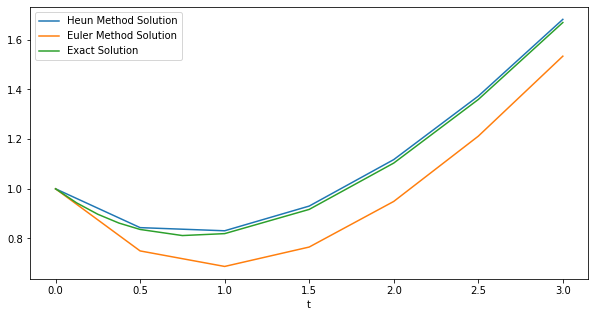

In [3]:
h = 1/2
n = int(3/h) + 1

# numerical solution
heun_solver = Heun(t0, y0, h, dydt)
heun_data_points = heun_solver.calculate_y_series(n)
print("Heun solution = {}".format(heun_data_points))

print()

euler_solver = Euler(t0, y0, h, dydt)
euler_data_points = euler_solver.calculate_y_series(n)
print("Euler solution = {}".format(euler_data_points))

# Comparing numerical solution with exact solution
data_viz.plot_data(heun_data_points, label="Heun Method Solution")
data_viz.plot_data(euler_data_points, label="Euler Method Solution")
data_viz.plot_data(exact_solution, label="Exact Solution")
data_viz.show()

Heun solution = [{'t': 0.0, 'y': 1}, {'t': 0.25, 'y': 0.8984375}, {'t': 0.5, 'y': 0.83807373046875}, {'t': 0.75, 'y': 0.8140807151794434}, {'t': 1.0, 'y': 0.8221962563693523}, {'t': 1.25, 'y': 0.8586576325760689}, {'t': 1.5, 'y': 0.9201430662585608}, {'t': 1.75, 'y': 1.0037200506813857}, {'t': 2.0, 'y': 1.1067997322421608}, {'t': 2.25, 'y': 1.2270966386200326}, {'t': 2.5, 'y': 1.3625931262817474}, {'t': 2.75, 'y': 1.5115079942956051}, {'t': 3.0, 'y': 1.6722687762140889}]

Euler solution = [{'t': 0.0, 'y': 1}, {'t': 0.25, 'y': 0.875}, {'t': 0.5, 'y': 0.796875}, {'t': 0.75, 'y': 0.759765625}, {'t': 1.0, 'y': 0.758544921875}, {'t': 1.25, 'y': 0.788726806640625}, {'t': 1.5, 'y': 0.8463859558105469}, {'t': 1.75, 'y': 0.9280877113342285}, {'t': 2.0, 'y': 1.03082674741745}, {'t': 2.25, 'y': 1.1519734039902687}, {'t': 2.5, 'y': 1.2892267284914851}, {'t': 2.75, 'y': 1.4405733874300495}, {'t': 3.0, 'y': 1.6042517140012933}]


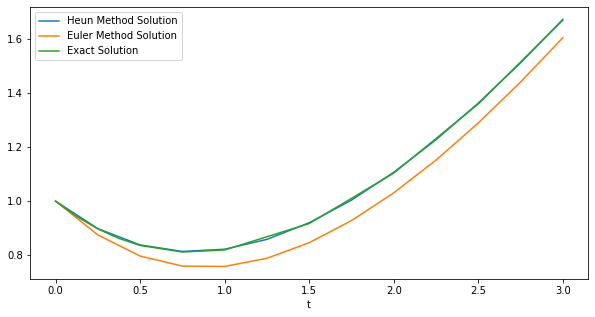

In [4]:
h = 1/4
n = int(3/h) + 1

# numerical solution
heun_solver = Heun(t0, y0, h, dydt)
heun_data_points = heun_solver.calculate_y_series(n)
print("Heun solution = {}".format(heun_data_points))

print()

euler_solver = Euler(t0, y0, h, dydt)
euler_data_points = euler_solver.calculate_y_series(n)
print("Euler solution = {}".format(euler_data_points))

# Comparing numerical solution with exact solution
data_viz.plot_data(heun_data_points, label="Heun Method Solution")
data_viz.plot_data(euler_data_points, label="Euler Method Solution")
data_viz.plot_data(exact_solution, label="Exact Solution")
data_viz.show()

Heun solution = [{'t': 0.0, 'y': 1}, {'t': 0.125, 'y': 0.943359375}, {'t': 0.25, 'y': 0.8977165222167969}, {'t': 0.375, 'y': 0.8624055609107018}, {'t': 0.5, 'y': 0.8368009273399366}, {'t': 0.625, 'y': 0.8203149336924014}, {'t': 0.75, 'y': 0.8123954748164943}, {'t': 0.875, 'y': 0.8125238738022144}, {'t': 1.0, 'y': 0.820212858005596}, {'t': 1.125, 'y': 0.8350046576185384}, {'t': 1.25, 'y': 0.8564692193642909}, {'t': 1.375, 'y': 0.8842025283480935}, {'t': 1.5, 'y': 0.9178250315145176}, {'t': 1.625, 'y': 0.956980156559537}, {'t': 1.75, 'y': 1.0013329205178463}, {'t': 1.875, 'y': 1.0505686225958673}, {'t': 2.0, 'y': 1.1043916161496332}, {'t': 2.125, 'y': 1.1625241550155734}, {'t': 2.25, 'y': 1.2247053096923648}, {'t': 2.375, 'y': 1.290689949144585}, {'t': 2.5, 'y': 1.3602477842549714}, {'t': 2.625, 'y': 1.4331624691926588}, {'t': 2.75, 'y': 1.5092307571907595}, {'t': 2.875, 'y': 1.5882617074389753}, {'t': 3.0, 'y': 1.6700759399963812}]

Euler solution = [{'t': 0.0, 'y': 1}, {'t': 0.125, 'y'

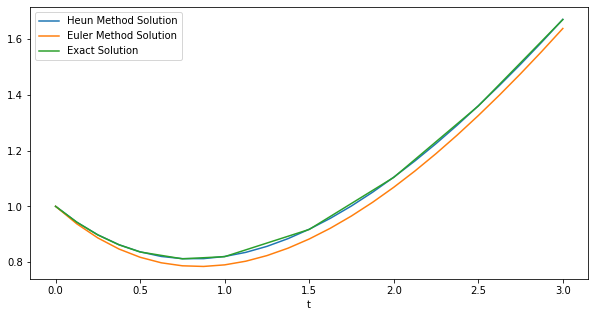

In [5]:
h = 1/8
n = int(3/h) + 1

# numerical solution
heun_solver = Heun(t0, y0, h, dydt)
heun_data_points = heun_solver.calculate_y_series(n)
print("Heun solution = {}".format(heun_data_points))

print()

euler_solver = Euler(t0, y0, h, dydt)
euler_data_points = euler_solver.calculate_y_series(n)
print("Euler solution = {}".format(euler_data_points))

# plot numerical solutions
data_viz.plot_data(heun_data_points, label="Heun Method Solution")
data_viz.plot_data(euler_data_points, label="Euler Method Solution")
data_viz.plot_data(exact_solution, label="Exact Solution")
data_viz.show()

## 9.2 Example

Given an EDO in the form of

#### `dy/dt = 1 + y²`

#### On [0, 1.4] with `t0 = 0`, `y0 = 0`, `h = 0.1` Comparing 2nd Order Runge-Kutta with different A values, and Eulers Method

In [6]:
t0 = 0
y0 = 0
dydt = lambda t, y: 1 + y*y
h = 0.1
n = 15

In [7]:
t0 = 0
y0 = 1
dydt = lambda t, y: (t - y) / 2
exact_solution = [{"t": 0, "y": 1.0}, {"t": 0.125, "y": 0.943239}, {"t": 0.25, "y": 0.897491}, {"t": 0.375, "y": 0.862087}, {"t": 0.5, "y": 0.836402}, {"t": 0.75, "y": 0.811868}, {"t": 1, "y": 0.819592}, {"t": 1.5, "y": 0.917100}, {"t": 2, "y": 1.103638}, {"t": 2.5, "y": 1.359514}, {"t": 3, "y": 1.669390}]
h = 1/8
n = int(3/h) + 1

RK 2nd Order A = 1/2, solution = [{'t': 0.0, 'y': 1}, {'t': 0.125, 'y': 0.943359375}, {'t': 0.25, 'y': 0.8977165222167969}, {'t': 0.375, 'y': 0.8624055609107018}, {'t': 0.5, 'y': 0.8368009273399366}, {'t': 0.625, 'y': 0.8203149336924014}, {'t': 0.75, 'y': 0.8123954748164943}, {'t': 0.875, 'y': 0.8125238738022144}, {'t': 1.0, 'y': 0.820212858005596}, {'t': 1.125, 'y': 0.8350046576185384}, {'t': 1.25, 'y': 0.8564692193642909}, {'t': 1.375, 'y': 0.8842025283480935}, {'t': 1.5, 'y': 0.9178250315145176}, {'t': 1.625, 'y': 0.956980156559537}, {'t': 1.75, 'y': 1.0013329205178463}, {'t': 1.875, 'y': 1.0505686225958673}, {'t': 2.0, 'y': 1.1043916161496332}, {'t': 2.125, 'y': 1.1625241550155734}, {'t': 2.25, 'y': 1.2247053096923648}, {'t': 2.375, 'y': 1.290689949144585}, {'t': 2.5, 'y': 1.3602477842549714}, {'t': 2.625, 'y': 1.4331624691926588}, {'t': 2.75, 'y': 1.5092307571907595}, {'t': 2.875, 'y': 1.5882617074389753}, {'t': 3.0, 'y': 1.6700759399963812}]

RK 2nd Order A = 0, solution = [{'t':

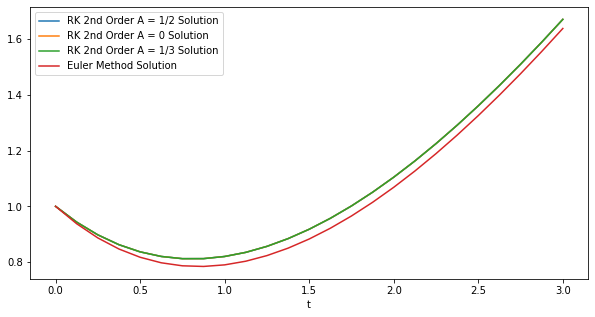

In [8]:
# numerical solution
rk_solver_1 = RungeKuttaSecondOrder(t0, y0, h, dydt, a=1/2)
rk_solver_1_data_points = rk_solver_1.calculate_y_series(n)
print("RK 2nd Order A = 1/2, solution = {}".format(rk_solver_1_data_points))

print()

rk_solver_2 = RungeKuttaSecondOrder(t0, y0, h, dydt, a=0)
rk_solver_2_data_points = rk_solver_2.calculate_y_series(n)
print("RK 2nd Order A = 0, solution = {}".format(rk_solver_2_data_points))

print()

rk_solver_3 = RungeKuttaSecondOrder(t0, y0, h, dydt, a=1/3)
rk_solver_3_data_points = rk_solver_3.calculate_y_series(n)
print("RK 2nd Order A = 1/3, solution = {}".format(rk_solver_3_data_points))

print()

euler_solver = Euler(t0, y0, h, dydt)
euler_data_points = euler_solver.calculate_y_series(n)
print("Euler solution = {}".format(euler_data_points))

# plot numerical solutions
data_viz.plot_data(rk_solver_1_data_points, label="RK 2nd Order A = 1/2 Solution")
data_viz.plot_data(rk_solver_2_data_points, label="RK 2nd Order A = 0 Solution")
data_viz.plot_data(rk_solver_3_data_points, label="RK 2nd Order A = 1/3 Solution")
data_viz.plot_data(euler_data_points, label="Euler Method Solution")
data_viz.show()

## 9.3 Example

Given an EDO in the form of

#### `dy/dt = -2t³ + 2t² - 20t + 8.5`

#### On [0, 4] with `t0 = 0`, `y0 = 0`, test `h = 1, 0.25, 0.1` Comparing Ruge Kutta 2nd, 3rd, 4th and 5th methods

In [9]:
t0 = 0
y0 = 0
dydt = lambda t, y: -2*(t**3) + 12*(t*t) - 20*t + 8.5

RK 2nd Order, solution = [{'t': 0, 'y': 0}, {'t': 1, 'y': 2.4375}, {'t': 2, 'y': 1.625}, {'t': 3, 'y': 3.5625}, {'t': 4, 'y': 2.25}]

RK 3rd Order, solution = [{'t': 0, 'y': 0}, {'t': 1, 'y': 2.0}, {'t': 2, 'y': 1.0}, {'t': 3, 'y': 3.0}, {'t': 4, 'y': 2.0}]

RK 4th Order, solution = [{'t': 0, 'y': 0}, {'t': 1, 'y': 2.0}, {'t': 2, 'y': 1.0}, {'t': 3, 'y': 3.0}, {'t': 4, 'y': 2.0}]

RK 5th Order, solution = [{'t': 0, 'y': 0}, {'t': 1, 'y': 2.0}, {'t': 2, 'y': 1.0}, {'t': 3, 'y': 3.0}, {'t': 4, 'y': 2.0}]


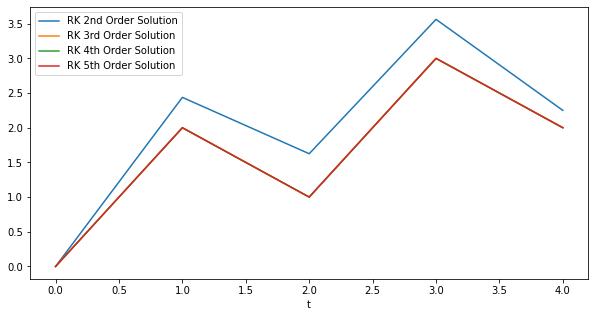

In [10]:
h = 1
n = 5

# numerical solution
rk_2nd_order_solver = RungeKuttaSecondOrder(t0, y0, h, dydt, a=1/3)
rk_2nd_order_solver_data_points = rk_2nd_order_solver.calculate_y_series(n)
print("RK 2nd Order, solution = {}".format(rk_2nd_order_solver_data_points))

print()

rk_3rd_order_solver = RungeKuttaThirdOrder(t0, y0, h, dydt)
rk_3rd_order_solver_data_points = rk_3rd_order_solver.calculate_y_series(n)
print("RK 3rd Order, solution = {}".format(rk_3rd_order_solver_data_points))

print()

rk_4th_order_solver = RungeKuttaFourthOrder(t0, y0, h, dydt)
rk_4th_order_solver_data_points = rk_4th_order_solver.calculate_y_series(n)
print("RK 4th Order, solution = {}".format(rk_4th_order_solver_data_points))

print()

rk_5th_order_solver = RungeKuttaFifthOrder(t0, y0, h, dydt)
rk_5th_order_solver_data_points = rk_5th_order_solver.calculate_y_series(n)
print("RK 5th Order, solution = {}".format(rk_5th_order_solver_data_points))

# plot numerical solutions
data_viz.plot_data(rk_2nd_order_solver_data_points, label="RK 2nd Order Solution")
data_viz.plot_data(rk_3rd_order_solver_data_points, label="RK 3rd Order Solution")
data_viz.plot_data(rk_4th_order_solver_data_points, label="RK 4th Order Solution")
data_viz.plot_data(rk_5th_order_solver_data_points, label="RK 5th Order Solution")
data_viz.show()

RK 2nd Order, solution = [{'t': 0.0, 'y': 0}, {'t': 0.25, 'y': 1.58984375}, {'t': 0.5, 'y': 2.2734375}, {'t': 0.75, 'y': 2.35546875}, {'t': 1.0, 'y': 2.09375}, {'t': 1.25, 'y': 1.69921875}, {'t': 1.5, 'y': 1.3359375}, {'t': 1.75, 'y': 1.12109375}, {'t': 2.0, 'y': 1.125}, {'t': 2.25, 'y': 1.37109375}, {'t': 2.5, 'y': 1.8359375}, {'t': 2.75, 'y': 2.44921875}, {'t': 3.0, 'y': 3.09375}, {'t': 3.25, 'y': 3.60546875}, {'t': 3.5, 'y': 3.7734375}, {'t': 3.75, 'y': 3.33984375}, {'t': 4.0, 'y': 2.0}]

RK 3rd Order, solution = [{'t': 0.0, 'y': 0}, {'t': 0.25, 'y': 1.560546875}, {'t': 0.5, 'y': 2.21875}, {'t': 0.75, 'y': 2.279296875}, {'t': 1.0, 'y': 2.0}, {'t': 1.25, 'y': 1.591796875}, {'t': 1.5, 'y': 1.21875}, {'t': 1.75, 'y': 0.998046875}, {'t': 2.0, 'y': 1.0}, {'t': 2.25, 'y': 1.248046875}, {'t': 2.5, 'y': 1.71875}, {'t': 2.75, 'y': 2.341796875}, {'t': 3.0, 'y': 3.0}, {'t': 3.25, 'y': 3.529296875}, {'t': 3.5, 'y': 3.71875}, {'t': 3.75, 'y': 3.310546875}, {'t': 4.0, 'y': 2.0}]

RK 4th Order, so

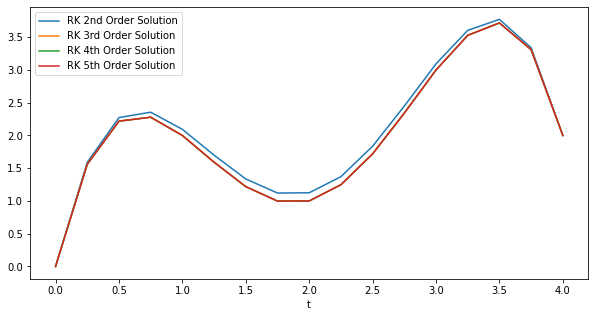

In [11]:
h = 0.25
n = 17

# numerical solution
rk_2nd_order_solver = RungeKuttaSecondOrder(t0, y0, h, dydt, a=1/2)
rk_2nd_order_solver_data_points = rk_2nd_order_solver.calculate_y_series(n)
print("RK 2nd Order, solution = {}".format(rk_2nd_order_solver_data_points))

print()

rk_3rd_order_solver = RungeKuttaThirdOrder(t0, y0, h, dydt)
rk_3rd_order_solver_data_points = rk_3rd_order_solver.calculate_y_series(n)
print("RK 3rd Order, solution = {}".format(rk_3rd_order_solver_data_points))

print()

rk_4th_order_solver = RungeKuttaFourthOrder(t0, y0, h, dydt)
rk_4th_order_solver_data_points = rk_4th_order_solver.calculate_y_series(n)
print("RK 4th Order, solution = {}".format(rk_4th_order_solver_data_points))

print()

rk_5th_order_solver = RungeKuttaFifthOrder(t0, y0, h, dydt)
rk_5th_order_solver_data_points = rk_5th_order_solver.calculate_y_series(n)
print("RK 5th Order, solution = {}".format(rk_5th_order_solver_data_points))

# plot numerical solutions
data_viz.plot_data(rk_2nd_order_solver_data_points, label="RK 2nd Order Solution")
data_viz.plot_data(rk_3rd_order_solver_data_points, label="RK 3rd Order Solution")
data_viz.plot_data(rk_4th_order_solver_data_points, label="RK 4th Order Solution")
data_viz.plot_data(rk_5th_order_solver_data_points, label="RK 5th Order Solution")
data_viz.show()

RK 2nd Order, solution = [{'t': 0.0, 'y': 0}, {'t': 0.1, 'y': 0.7559}, {'t': 0.2, 'y': 1.335}, {'t': 0.30000000000000004, 'y': 1.7595}, {'t': 0.4, 'y': 2.0504000000000002}, {'t': 0.5, 'y': 2.2275}, {'t': 0.6000000000000001, 'y': 2.3094}, {'t': 0.7000000000000001, 'y': 2.3135}, {'t': 0.8, 'y': 2.256}, {'t': 0.9, 'y': 2.1519}, {'t': 1.0, 'y': 2.015}, {'t': 1.1, 'y': 1.8579000000000003}, {'t': 1.2000000000000002, 'y': 1.6920000000000004}, {'t': 1.3, 'y': 1.5275000000000003}, {'t': 1.4000000000000001, 'y': 1.3734000000000004}, {'t': 1.5, 'y': 1.2375000000000005}, {'t': 1.6, 'y': 1.1264000000000007}, {'t': 1.7000000000000002, 'y': 1.0455000000000014}, {'t': 1.8, 'y': 0.9990000000000017}, {'t': 1.9000000000000001, 'y': 0.9899000000000019}, {'t': 2.0, 'y': 1.020000000000002}, {'t': 2.1, 'y': 1.0899000000000019}, {'t': 2.2, 'y': 1.199000000000002}, {'t': 2.3000000000000003, 'y': 1.3455000000000021}, {'t': 2.4000000000000004, 'y': 1.526400000000002}, {'t': 2.5, 'y': 1.7375000000000025}, {'t': 2

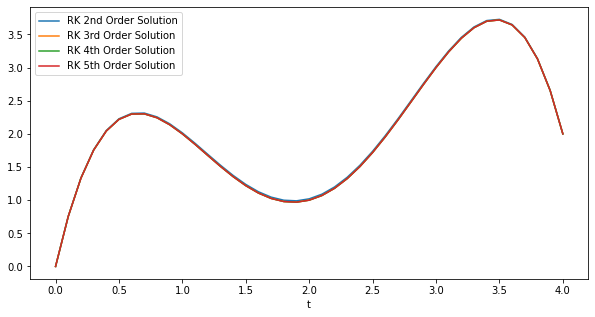

In [12]:
h = 0.1
n = 41

# numerical solution
rk_2nd_order_solver = RungeKuttaSecondOrder(t0, y0, h, dydt, a=1/2)
rk_2nd_order_solver_data_points = rk_2nd_order_solver.calculate_y_series(n)
print("RK 2nd Order, solution = {}".format(rk_2nd_order_solver_data_points))

print()

rk_3rd_order_solver = RungeKuttaThirdOrder(t0, y0, h, dydt)
rk_3rd_order_solver_data_points = rk_3rd_order_solver.calculate_y_series(n)
print("RK 3rd Order, solution = {}".format(rk_3rd_order_solver_data_points))

print()

rk_4th_order_solver = RungeKuttaFourthOrder(t0, y0, h, dydt)
rk_4th_order_solver_data_points = rk_4th_order_solver.calculate_y_series(n)
print("RK 4th Order, solution = {}".format(rk_4th_order_solver_data_points))

print()

rk_5th_order_solver = RungeKuttaFifthOrder(t0, y0, h, dydt)
rk_5th_order_solver_data_points = rk_5th_order_solver.calculate_y_series(n)
print("RK 5th Order, solution = {}".format(rk_5th_order_solver_data_points))

# plot numerical solutions
data_viz.plot_data(rk_2nd_order_solver_data_points, label="RK 2nd Order Solution")
data_viz.plot_data(rk_3rd_order_solver_data_points, label="RK 3rd Order Solution")
data_viz.plot_data(rk_4th_order_solver_data_points, label="RK 4th Order Solution")
data_viz.plot_data(rk_5th_order_solver_data_points, label="RK 5th Order Solution")
data_viz.show()

## 9.5 Example

Adaptive Runge-Kuta Methods

Given an EDO in the form of

#### `dy/dt = -4e^(0.8t) - 0.5y`

#### On [0, 2] with `t0 = 0`, `y0 = 2`, test `h = 0.5, 0.2` using Runge-Kutta-Fehlberg (RKF45) method 

In [13]:
t0 = 0
y0 = 2
dydt = lambda t, y: 4 * exp(0.8*t) - 0.5*y

exact_solution = lambda t: 4/1.3 * (exp(0.8*t) - exp(-0.5*t)) + 2 * exp(-0.5*t)

RK Fehlberg, solution = [{'t': 0.0, 'y': 2}, {'t': 0.5, 'y': 3.8043246976412703}, {'t': 1.0, 'y': 6.316538121755663}, {'t': 1.5, 'y': 9.924068026727511}, {'t': 2.0, 'y': 15.196298262328394}]

Exact solution = [{'t': 0.0, 'y': 2.0}, {'t': 0.5, 'y': 3.7515213032808568}, {'t': 1.0, 'y': 6.194631377209372}, {'t': 1.5, 'y': 9.707041936237516}, {'t': 2.0, 'y': 14.84392190764649}]


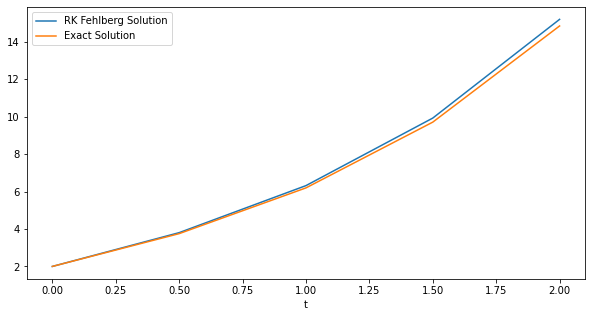

In [14]:
h = 0.5
n = 5

# numerical solution
rk_fehlberg_solver = RungeKuttaSecondOrder(t0, y0, h, dydt, a=1/2)
rk_fehlberg_solver_data_points = rk_fehlberg_solver.calculate_y_series(n)
print("RK Fehlberg, solution = {}".format(rk_fehlberg_solver_data_points))

print()

# exact solution
points = [t0 + i * h for i in range(n)]
exact_solution_data_points = [{"t": t, "y": exact_solution(t)} for t in points]
print("Exact solution = {}".format(exact_solution_data_points))

# comparing exact solution with numerical solution
data_viz.plot_data(rk_fehlberg_solver_data_points, label="RK Fehlberg Solution")
data_viz.plot_data(exact_solution_data_points, label="Exact Solution")
data_viz.show()

RK Fehlberg, solution = [{'t': 0.0, 'y': 2}, {'t': 0.2, 'y': 2.639404348396724}, {'t': 0.4, 'y': 3.36197595459047}, {'t': 0.6000000000000001, 'y': 4.184783994942477}, {'t': 0.8, 'y': 5.127608651934365}, {'t': 1.0, 'y': 6.21343531794737}, {'t': 1.2000000000000002, 'y': 7.469032286368906}, {'t': 1.4000000000000001, 'y': 8.925626630913383}, {'t': 1.6, 'y': 10.619695504389806}, {'t': 1.8, 'y': 12.593893059476338}, {'t': 2.0, 'y': 14.89813668270289}]

Exact solution = [{'t': 0.0, 'y': 2.0}, {'t': 0.2, 'y': 2.636362383628383}, {'t': 0.4, 'y': 3.355606156180503}, {'t': 0.6000000000000001, 'y': 4.174732384474745}, {'t': 0.8, 'y': 5.113442655976854}, {'t': 1.0, 'y': 6.194631377209372}, {'t': 1.2000000000000002, 'y': 7.444961233200643}, {'t': 1.4000000000000001, 'y': 8.895536452203105}, {'t': 1.6, 'y': 10.582691040394629}, {'t': 1.8, 'y': 12.548912111037978}, {'t': 2.0, 'y': 14.84392190764649}]


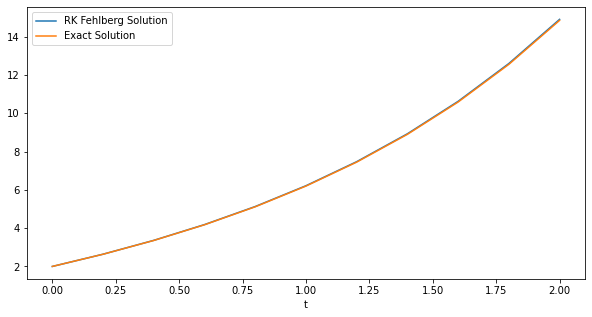

In [15]:
h = 0.2
n = 11

# numerical solution
rk_fehlberg_solver = RungeKuttaSecondOrder(t0, y0, h, dydt, a=1/2)
rk_fehlberg_solver_data_points = rk_fehlberg_solver.calculate_y_series(n)
print("RK Fehlberg, solution = {}".format(rk_fehlberg_solver_data_points))

print()

# exact solution
points = [t0 + i * h for i in range(n)]
exact_solution_data_points = [{"t": t, "y": exact_solution(t)} for t in points]
print("Exact solution = {}".format(exact_solution_data_points))

# comparing exact solution with numerical solution
data_viz.plot_data(rk_fehlberg_solver_data_points, label="RK Fehlberg Solution")
data_viz.plot_data(exact_solution_data_points, label="Exact Solution")
data_viz.show()